<a href="https://colab.research.google.com/github/sewanmp/molecular/blob/main/Microorganisms_image_classification_%7CInceptionV3%7C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'microorganism-image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2384175%2F4032122%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240901%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240901T204012Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6f19ac168c24c629e66fc2786817674a38abd23d81fe254e1c10be0331e1877c5a3a7a76f73bc719f51a69672c2ff0ffa1f41a2efe3861c0ba5e64c5fe7d2ece02053adb125d14a99f289df509ebbeeb46a2c445b6def23664eb9f61e8c42108391471907d255e9f002743d00fcbb63fdfbcc3ab9af3a8a2cfd80c81527b1f595373bef695a5f9f3cf1164a83d93f3cf0485dcb26824dbfe89ad755b2c998d632671117eda66e4f77728221164aa8080355e47dd7b8888c30e3d16ce735f1b2096d1aabe6e46f10c8377155b4f12350f502af5e7243503e83e144a1c14f52aaa2be1cef7df1acad9b8db32d91cba0eb9604ad2a5dc4214cf4c67eed098b8a84a,test222:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5628773%2F9296789%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240901%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240901T204012Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8720e9e15086add41d41d1de405aec198f56d820ee9a97bc448205c0f9592c40ee330bf56a8d555d3a7f660d2d2a3215c13f8bfc5fc1426c51ecbe3f47f48a4885809e8fc8ebe912f8c785ee074ebe6ef6fdb6bd3520a29aee3a8424411fc86919ca4b841fadb2b465e9a52725c9c8f7788a2bc0f67d9149cd09567ec6915eb8863a7bb2eb8e9eee3a156e70b8b67b36821e52b539e31167de8525846991a16597eb7a7ebbdad81c7178d0abf074b9376cf15d51e09e3fa0dbe65ce09735ee79aa80bc3c4c3084ddd1c99d638053e8a31ac1129ccca8703b20cd0ce715e2aec8c352d1bdb4d94c00d788a78b58f63daaf06f892d2966a5052085e3042a8367f5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 106213915 bytes downloaded
Downloaded and uncompressed: microorganism-image-classification
[==================================================] 973399 bytes downloaded
Downloaded and uncompressed: test222
Data source import complete.


# **Introduction**

**About Data**
The data consist of **8 classes**. Each class represents a **micro-organism**. These classes are:

1. **Amoeba**
2. **Euglena**
3. **Hydra**
4. **Paramecium**
5. **Rod bacteria**
6. **Spherical Bacteria**
7. **Spiral Bacteria**
8. **Yeast**

Most of these classes represent a **microorganism**, which is a **bacteria**. As a **total number of images** is **very less** to train a **model from scratch**. We will be using **transfer learning** approach to **train the model**.

# **Imports**

Below are **all the imports** used in the **notebook**.

In [ ]:
!pip install keras.preprocessing
!pip install keras.preprocessing.image
!pip install tensorflow.keras.applications
!pip install tensorflow.keras.optimizers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.applications (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.applications
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.optimizers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.optimizers


In [ ]:
# Common
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC

# Pre-Trained Model
from tensorflow.keras.applications import ResNet50V2, ResNet50, InceptionV3, Xception

# **Enable effective use of GPU**

In [ ]:
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1' # This will allow automatic expression to take place.

This is the process, which converts the **model weights** during the training into **16FP and 32FP**, while **loading and saving the weights**. This allow for **better utilization of the GPU memory**.

# **Data Information**

Before loading the data into memory, let's have a look at the **data distribution**. More specifically, at the **class distribution**.

In [ ]:
#  Specify root path
root_path = '../input/microorganism-image-classification/Micro_Organism/'

# Get class names
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Calculate class distribution
class_dis = [len(os.listdir(root_path + name)) for name in class_names]

# Show
print(f"Number of Classes : {n_classes}\nClass names : {class_names}")

Number of Classes : 8
Class names : ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']


Let's look at how each **class is distributed in the data**.

In [ ]:
# Pie plot
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()

All the **classes are not equally distributed**. This is **not a good sign**, because this can make the **model biased towards the highly populated class**. Let's look at this in terms of the **actual numbers**.

In [ ]:
# Bar Plot
fig = px.bar(x=class_names, y=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()

**On average**, classes are **equally distributed**, but **two classes** are **highly populated** as compared to the **rest of the classes**.

---
One way to **solve this problem** is to **fix the data set**. But for now, we **can continue** with **this data set**. But it will be a **good idea to fix the data set** and **make all the classes equally distributed**.

# **Data Loading**

OK so now, we have the knowledge of the **class distribution and the data distribution**. But now let's **load the data** and **visualize it**, in order to **understand the actual problem**. For loading the data, I'm going to use **image data generator** from **Keras**.

In [ ]:
# Initialize generator
gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    brightness_range=[0.3,0.8],
    validation_split=0.1
)

Here, I have applied **few augmentations** on the data set, such as **random rotation**, **horizontal flip**, **brightness range**, and at last, as there is **no provided validation data set** for evaluationg the model, We will use **10%** of the whole data as **validation data**.

In [ ]:
# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    batch_size=128, # For better utilization of GPU, I have kept the batch size a little bit
    shuffle=True,
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='training'
)

valid_ds = gen.flow_from_directory(
    root_path,
    batch_size=64, # For faster inference, the batch size here is small.
    shuffle=True,
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='validation'
)

Found 714 images belonging to 8 classes.
Found 75 images belonging to 8 classes.


# **Data Visulization**

For **better understanding the actual image classification problem**, we need to have a **look at the images**. For this, we will **create a function** that will also help us at the **inference time**.

In [ ]:
def show_images(data, GRID=[2,6], model=None, size=(25,10)):

    # The plotting configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=size)

    # Data for visualization
    images, labels = next(iter(data)) # This process can take a little time because of the large batch size

    # Iterate through the subplots.
    for i in range(1, n_images+1):

        # Select a random data
        id = np.random.randint(len(images)) # This is a dynamic function because for validation data and training data, the length of total images is different.
        image, label = images[id], class_names[int(labels[id])]

        # Plot the sub plot
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        plt.axis('off')

        # If model is available make predictions.
        if model is not None:
            pred = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
            title = f"Class : {label}\nPred : {pred}"
        else:
            title = f"Class : {label}"

        plt.title(title)
    plt.show()

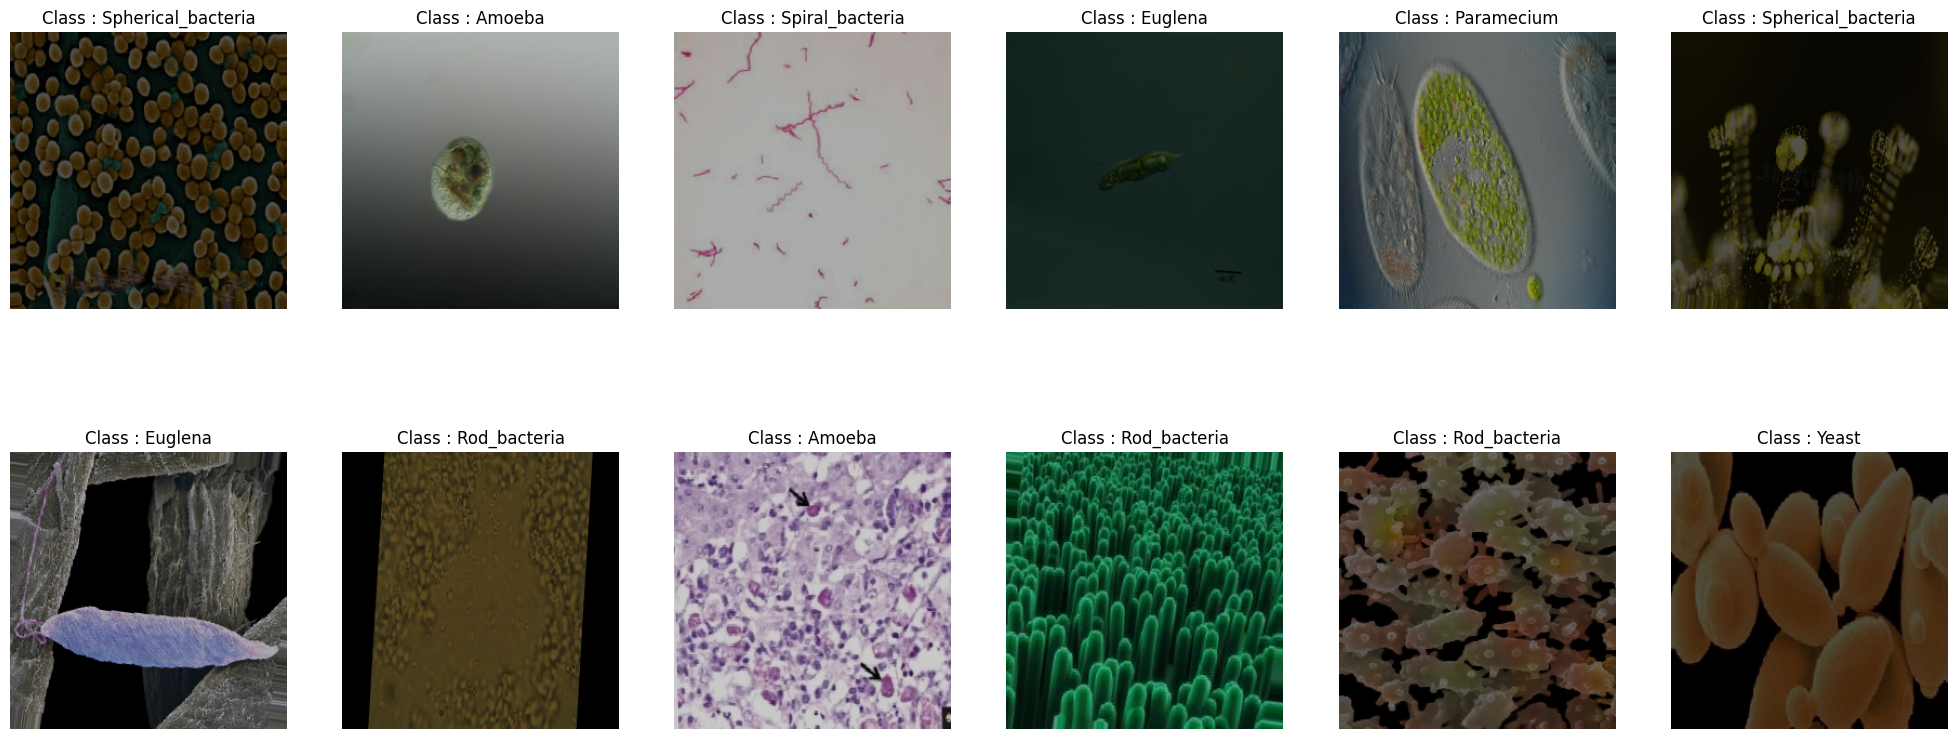

In [ ]:
show_images(data=train_ds)

This can be a **tough task** for the **model** because of the **wide variety of geometric shapes and color differences**. But this **wide variety** also makes it **easy to classify each of the bacteria individually**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/training/my_code.py'

# Your code to be saved
code_to_save = """
# Your Python code
print('Hello, Google Drive!')
"""

# Save the code to the specified file
with open(file_path, 'w') as f:
    f.write(code_to_save)

print(f'Code has been saved to {file_path}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/training/my_code.py'

# **Model**

In [ ]:
# Give you a model, a name
name = "inception-v3"

# Base model
base = InceptionV3(input_shape=(256,256,3), include_top=False)
base.trainable = False

# Model Architecture
model = Sequential([
    base, GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# Define the model name
name = "inception-v3"

# Base model
base = InceptionV3(input_shape=(256, 256, 3), include_top=False)
base.trainable = False

# Model Architecture
model = Sequential([
    base,
    GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# Callbacks with modified file extension
checkpoint_path = '/content/drive/My Drive/Training/' + name + "_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.keras"
cbs = [
    ES(patience=3, restore_best_weights=True),
    MC(checkpoint_path, save_best_only=False, save_weights_only=False)  # Save model at each epoch
]

# Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Higher than the default learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training
history = model.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=cbs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.1897 - loss: 2.5007 - val_accuracy: 0.3733 - val_loss: 1.6953
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4275 - loss: 1.6160 - val_accuracy: 0.5333 - val_loss: 1.3940
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 922ms/step - accuracy: 0.5533 - loss: 1.3089 - val_accuracy: 0.6133 - val_loss: 1.2489
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6421 - loss: 1.0846 - val_accuracy: 0.6667 - val_loss: 1.1358
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6849 - loss: 0.9629 - val_accuracy: 0.6933 - val_loss: 1.0735
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 919ms/step - accuracy: 0.7298 - loss: 0.8436 - val_accuracy: 0.6667 - val_loss: 0.9851
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7430 - loss: 0.7770 - val_accuracy: 0.7200 - val_loss: 0.9916
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 872ms/step - accuracy: 0.7942 - loss: 0.6623 - val_accuracy: 0.7333 - val_loss: 1.0186

I have already tried out other models and other variations, such as changing the dropout rate, applying regularizations, changing the total number of units, using different pre-trained model, but this was the most robust out of them. The reason behind low validation performance is because of the highly less number of images available for training.

In [ ]:



# Define model name and paths
name = "inception-v3"
checkpoint_dir = '/content/drive/My Drive/Training/'
saved_model_path = checkpoint_dir + name + "_epoch_47_val93_loss_1.14.keras"  # Replace XX.XX with the actual validation loss

base = InceptionV3(input_shape=(256, 256, 3), include_top=False)
base.trainable = False

model = Sequential([
    base,
    GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None, 256, 256, 3))
# Load the weights into the model
model.load_weights(saved_model_path)

# Define callbacks again for continued training
checkpoint_path = checkpoint_dir + name + "_epoch_{epoch:02d}_val93_loss_{val_loss:.2f}.keras"
cbs = [
    ES(patience=3, restore_best_weights=True),
    MC(checkpoint_path, save_best_only=False, save_weights_only=False)  # Save model at each epoch
]


# Compile the model (if not saved with optimizer state, recompile)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Resume training
initial_epoch = 47
history = model.fit(train_ds, validation_data=valid_ds, epochs=50, initial_epoch=initial_epoch, callbacks=cbs)


Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.9757 - loss: 0.1238 - val_accuracy: 0.6667 - val_loss: 1.2681
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9738 - loss: 0.1011 - val_accuracy: 0.7600 - val_loss: 1.2227
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 918ms/step - accuracy: 0.9672 - loss: 0.1050 - val_accuracy: 0.7200 - val_loss: 1.1036


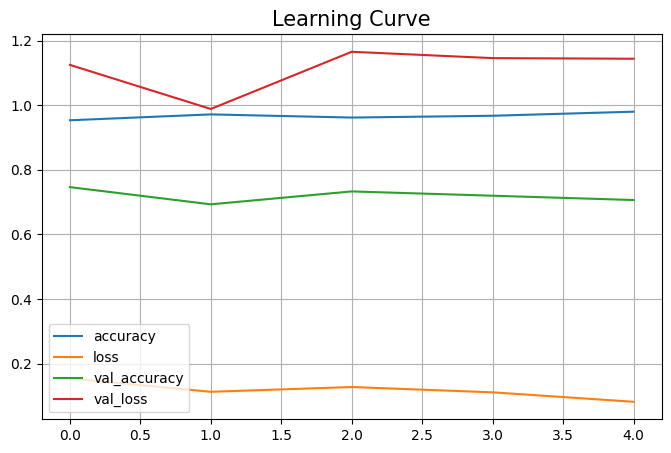

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

The curves are **not perfect**, but they are **still satisfying**. Let's have a look at the **model predictions.**

# **Model predictions**

In [ ]:
show_images(data=valid_ds, model=model)

Despite of the **low validation accuracy** majority of all the classes are **correctly classified**. I think this **low accuracy** is **because of the low number of training images**. But if I'm wrong, please let me know in the comments.

Thank you.

---
**Deep nets**